# PS Insper Data

## Informações Gerais

> **Candidato:** Wilgner Lopes Araujo

> **Curso:** Engenharia Mecatrônica

> **Semestre:** 2° Semestre

> **Repositorio do git:** [https://github.com/wilgnerl?tab=repositories](#Repositorio)

## Objetivo desse trabalho

> Fazer uma breve análise utilizando quaisquer métodos desejados, sejam eles a visualização e descrição da base, como gráficos, estatísticas descritivas, tabelas etc.; e/ou analises mais teóricas, embasadas em literatura (seja essa composta por artigos acadêmicos e científicos e/ou notícias de fontes confiáveis). **(Retirado do Email)**

## Informações sobre o DataSet

### Explicando os rotulos

## País
> Países do mundo

## Continente
> Continentes do mundo

## Ano
> Ano: de 1952 a 2007

## Expectativa_de_vida
> Expectativa de vida no Ano de nascimento em Anos

## Populacao
> População do país

## Pib_per_capita
> PIB per capita (USD, PPC 2005)

## Iniciando a EDA(Exploratory Data Analysis) e Data Cleaning

> Primeiro vamos importar as bibliotecas necessarias para o nosso trabalho

In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
from scipy import stats

#Checando as versões das bibliotecas 
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do matplotlib -> %s' % mpl.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scipy.__version__)


Versão do pandas -> 1.0.1
Versão do numpy -> 1.18.1
Versão do matplotlib -> 3.1.3
Versão do seaborn -> 0.10.0
Versão do scipy -> 1.4.1


> Agora vamos importar nosso dataset para nossa area de trabalho com o jupyter

In [19]:
df = pd.read_excel('../data/base_2/base_2.xlsx')
df.head()

,país,continente,ano,expectativa_de_vida,população,pib_per_cápita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


> Agora que temos nossa base de dados vamos primeiro analisar os dados fundamentais dele(tamanho, informações sobre as colunas, tipos de variaveis, etc.)

In [20]:
def tamanho_df(df):
    return df.shape
def info_df(df):
    return df.info()

In [21]:
tamanho = tamanho_df(df)
print(f'O nosso dataset tem {tamanho[0]} linhas e {tamanho[1]} colunas \n')
info_df(df)

O nosso dataset tem 1704 linhas e 6 colunas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   país                 1704 non-null   object 
 1   continente           1704 non-null   object 
 2   ano                  1704 non-null   int64  
 3   expectativa_de_vida  1704 non-null   float64
 4   população            1704 non-null   int64  
 5   pib_per_cápita       1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Primeiras conclusões:
* O dataset tem 1704 linhas e 6 colunas
    
* Não existem valores não nulos(NaN) no dataset

* Temos 2 variaveis do tipo objeto que podem ser consideradas Qualititativas Nominais

* Temos 2 Variaveis numericas que são Quantitativas discretas (Ano e População) e 2 Variaveis numerica Quantitativa continua (Expecativa de vida e Pib per capita

In [22]:
#Como afirmado assima, vamos passar as variaveis qualitativas para categoricas

df['país'] = df['país'].astype('category')
df['continente'] = df['continente'].astype('category')

In [23]:
info_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   país                 1704 non-null   category
 1   continente           1704 non-null   category
 2   ano                  1704 non-null   int64   
 3   expectativa_de_vida  1704 non-null   float64 
 4   população            1704 non-null   int64   
 5   pib_per_cápita       1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 64.7 KB


## Extraindo informações das colunas

> Vamos verificar os rotulos nas variaveis qualitativas e tirar as estatisticas descritivas das variaveis quantitativas

In [24]:
#Rotulos dos paises
nomes_paises = list(df.país.unique())
print(f'Na coluna país temos um total de {len(nomes_paises)} países \n', 'Mostrando os 10 primeiros paises')
nomes_paises[:10]

Na coluna país temos um total de 142 países 
 Mostrando os 10 primeiros paises


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belgium']

In [25]:
#Vamos checar o mesmo com os continentes agora
continentes = list(df.continente.unique())
print(f'Na coluna país temos um total de {len(continentes)} países \n')
continentes

Na coluna país temos um total de 5 países 



['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']

In [26]:
# Agora vamos extrair as estatisticas descritivas
def describe_df(df, column):
    return df[column].describe()


In [27]:
describe_df(df, 'ano')

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: ano, dtype: float64

### Na variavel Ano, obtemos que:
* A média dos anos dataset é **1979.5**

* Com desvio-padrão de **17,26 anos**

* Sendo o Menor ano **1952**

* O maior **2007**

In [28]:
describe_df(df, 'expectativa_de_vida')

count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: expectativa_de_vida, dtype: float64

### Na variavel Expectativa de vida, obtemos que:
* A média da expectativa de vida no dataset é **59.47 Anos**

* Com desvio-padrão de **12.91 Anos**

* Sendo a menor expectativa de vida de: **23.59 Anos**

* E a maior **82.603 Anos**

In [29]:
describe_df(df, 'população')

count    1.704000e+03
mean     2.960121e+07
std      1.061579e+08
min      6.001100e+04
25%      2.793664e+06
50%      7.023596e+06
75%      1.958522e+07
max      1.318683e+09
Name: população, dtype: float64

### Na variavel População, obtemos que:
* A média da população no dataset é de**2.960121e+07 habitantes**

* Com desvio-padrão de **1.061579e+08 Habitantes**

* Sendo a menor população de: **6.001100e+04 Habitantes**

* E a maior **1.318683e+09 Habitantes**

In [30]:
describe_df(df, 'pib_per_cápita')

count      1704.000000
mean       7215.327081
std        9857.454543
min         241.165876
25%        1202.060309
50%        3531.846988
75%        9325.462346
max      113523.132900
Name: pib_per_cápita, dtype: float64

### Na variavel Pib per cápita, obtemos que:
* A média do pib per cápita no dataset é de**7215.327081**

* Com desvio-padrão de **9857.454543**

* Sendo o menor pib per cápita de: **241.165876**

* E a maior **113523.132900**

## Vamos observar como foi a evolução na expectativa de vida media dos paises nesse periodo de 1952 a 2007

In [66]:
df.head()

,país,continente,ano,expectativa_de_vida,população,pib_per_cápita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [67]:
media_continentes = df.groupby('continente').mean()
media_continentes

,ano,expectativa_de_vida,população,pib_per_cápita
continente,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


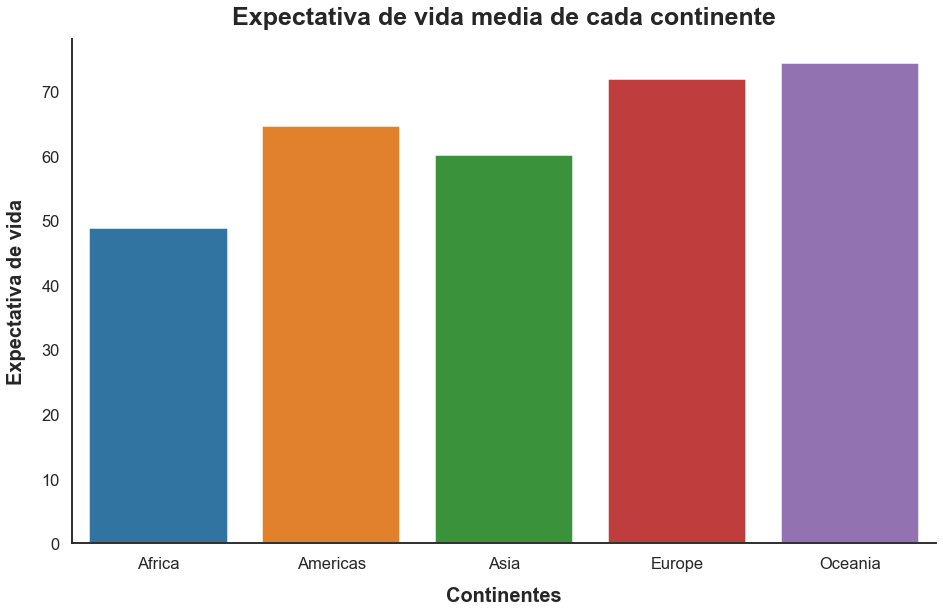

In [68]:
rotulos = media_continentes.index
fig = plt.figure(figsize=(12,7))
ax = fig.add_axes([0,0,1,1])
sns.set_style("white")
sns.despine()
sns.color_palette("hls", 8)
sns.set_context("talk")
sns.barplot(ax=ax, x=rotulos, y='expectativa_de_vida', data=media_continentes)
ax.set_title('Expectativa de vida media de cada continente', fontsize=25, fontweight='bold',
                            pad=15)
ax.set_xlabel('Continentes', fontsize=20, fontweight='bold', labelpad=15);
ax.set_ylabel('Expectativa de vida', fontsize=20, fontweight='bold', labelpad=15);


* Com o grafico e a tabela acima, podemos concluir que dentre a evolução de cada continente, a oceania foi a que teve o maior crescimento na expectativa de vida, ja a Africa foi a que teve a menor evolução. Com isso quais serão os motivos que fizeram a africa ser a menor ? Vamos analisar...

* Dentre nossas variaveis as que podem ser causadora de algum efeito são população e pib per cápita, podemos então suspeitar que existe alguma relação entre elas e a expectativa de vida

## Analise de covariancia e correlação entre as variaveis

In [71]:
df['expectativa_de_vida'].cov(df['população'])

89070241.92997819

In [73]:
df['expectativa_de_vida'].cov(df['pib_per_cápita'])

74323.19574798533

In [69]:
df['expectativa_de_vida'].corr(df['população'])

0.06495536916882556

In [70]:
df['expectativa_de_vida'].corr(df['pib_per_cápita'])

0.5837062198659806

* Podemos concluir a partir dos resultados que as variaveis tem associações positivas, porem a relação entre expectativa de vida e população e fraca, logo ela não e um fator a se levar em consideração, ja a relação entre o pib per capita e população segue uma relação positiva moderada, nos levando assim a suspeitar que a expectativa de vida esteja ligada ao aumento ou diminuição do pib per cápita

* Com isso vamos visualizar agora a relação dessas duas variaveis

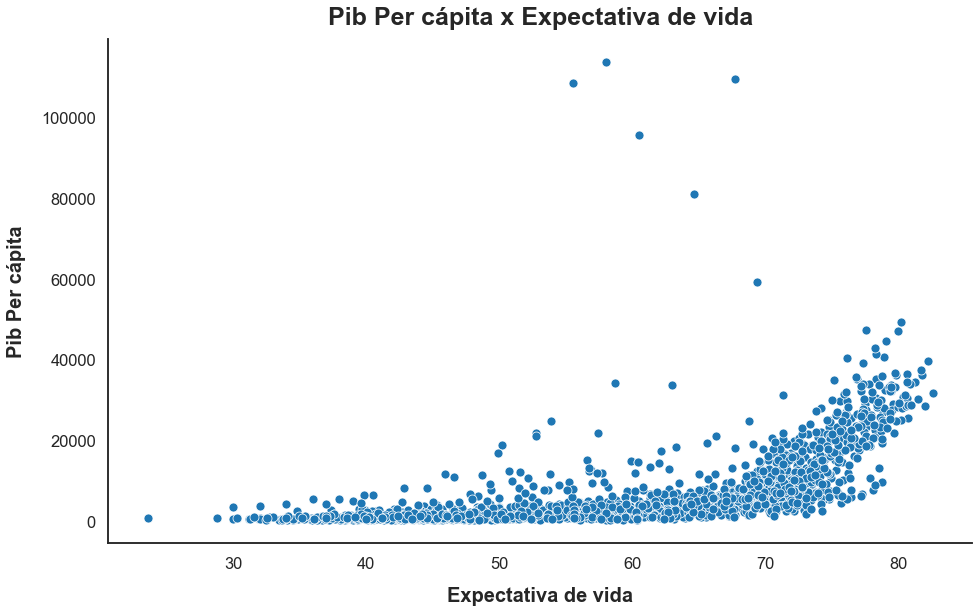

In [81]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_axes([0,0,1,1])
sns.set_style("white")
sns.despine()
sns.color_palette("hls", 8)
sns.set_context("talk")
sns.scatterplot(ax=ax, data=df, x="expectativa_de_vida", y="pib_per_cápita")
ax.set_title('Pib Per cápita x Expectativa de vida', fontsize=25, fontweight='bold',
                            pad=15)
ax.set_xlabel('Expectativa de vida', fontsize=20, fontweight='bold', labelpad=15);
ax.set_ylabel('Pib Per cápita', fontsize=20, fontweight='bold', labelpad=15);